# Logging the Temperature
The simplest way to get the internal Red Pitaya temperature is to use `xadc_get_value_temp` as described in the forum post below
https://forum.redpitaya.com/viewtopic.php?t=1078 

This command can be run repeatedly to create a graph

Get the current temperature, this is returned as a string 

In [1]:
current_temp = !xadc_get_value_temp

Use only the first 5 characters and return them as a floating point number

In [2]:
temp_value = float(current_temp[0][:5])

Collect the temperature for 15 minutes

In [3]:
import time
from IPython.display import display, clear_output

temp_list = [temp_value] #Store the values here
minutes = 1 # Time to record the temerature values
rate = 5 # Record every 15 seconds

t_end = time.time() + minutes * 60
timer = int(t_end-time.time())
recorded_this_step = False

while time.time() < t_end:
    current_temp = !xadc_get_value_temp
    temp_value = float(current_temp[0][:5])
    #Add a temperature to the list every 15 seconds
    if (timer % rate==0 and recorded_this_step==False):
        temp_list.append(temp_value)
        recorded_this_step=True
    else:
        recorded_this_step = False
    
    clear_output(wait=True)
    display('Collecting temperatures. Time left: '+str(timer)+' Seconds. '+str(len(temp_list)) + ' value(s) recorded.')
    timer = int(t_end-time.time())
    time.sleep(0.5)
#temp_list.append(temp_value)

clear_output(wait=True)
display('Collecting temperature finished ' + str(len(temp_list)) + ' values recorded.')

'Collecting temperature finished 13 values recorded.'

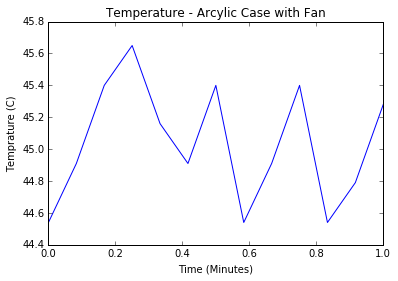

In [4]:
import matplotlib.pyplot as plt
import numpy as np

N = len(temp_list)
t_vec = np.append(np.arange(0,minutes,(rate/60)),minutes) # time vector for plotting

plt.plot(t_vec,temp_list)  # Plot some data on the (implicit) axes.
plt.xlabel('Time (Minutes)')
plt.ylabel('Temprature (C)')
plt.title("Temperature - Arcylic Case with Fan")
plt.show()

In [5]:
t_vec = np.append(np.arange(0,minutes+0.01,(rate/60)),minutes)
len(t_vec)

14

In [6]:
temp_value = float(current_temp[0][:5])
temp_list = np.append(temp_list,temp_value)
len(temp_list)

14

In [7]:
current_temp = !xadc_get_value_temp
float(current_temp[0][:5])

44.66

In [8]:
len(temp_list)

14